In [1]:
import pandas as pd
import re
import numpy as np
import nltk
import os
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
%matplotlib inline 
from IPython.display import display

## Load and Preprocess Data

### Loading data

In [2]:
tsv_path = r'C:\Users\Personal\Desktop\Faktion\in.tsv'

df = pd.read_table(tsv_path,sep='\t', header=None, names=['filename','keys','text_djvu','text_tesseract','text_textract','text_best'])

In [3]:
df.drop(['keys','text_djvu','text_tesseract', 'text_textract'], axis=1, inplace=True)  

In [4]:
df.head(2)

,filename,text_best
0,008482cf51383c158b54e593cfa5fbf7.pdf,TAR\n1\nAugust 2016\nTrustees' Annual Report f...
1,009fab39d746267b6de8428366fe4b02.pdf,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...


### Remove Duplicates

In [5]:
#check duplicates
df.describe(include='all')

,filename,text_best
count,1729,1729
unique,1729,1728
top,154d01224d9939d6b12a1d71bd531efe.pdf,St John the Evangelist\nUpper St Leonards\n{;:...
freq,1,2


In [6]:
#drop duplicates in text_best
df.drop_duplicates(['text_best'], inplace = True)

In [7]:
#confirm if duplicates have been dropped 
df.describe(include='all')

,filename,text_best
count,1728,1728
unique,1728,1728
top,154d01224d9939d6b12a1d71bd531efe.pdf,Charity Registration No. 1076483\nCompany Regi...
freq,1,1


In [8]:
df.shape

(1728, 2)

### Remove Nulls

In [9]:
#check for nulls
df.isnull().sum()

filename     0
text_best    0
dtype: int64

In [10]:
#drop nulls from text_best
#df.dropna(subset = ['text_best'], inplace=True)

#alternative method
#df = df[df['text_best'].notna()]

### Clean text_best column

In [11]:
df.iloc[0,-1][0:1000]

"TAR\\n1\\nAugust 2016\\nTrustees' Annual Report for the period\\nFrom\\nPeriod start date\\nTo\\nPeriod end date\\n30\\n04\\n2015\\n29\\n04\\n2016\\nSection A\\nReference and administration details\\nCharity name\\nPC Nicola Hughes Memorial Fund\\nOther names charity is known by\\nRegistered charity number (if any) 1156398\\nCharity's principal address Unit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode\\nOL3 5DE\\nNames of the charity trustees who manage the charity\\nTrustee name\\nOffice (if any)\\nDates acted if not for whole\\nyear\\nName of person (or body) entitled\\nto appoint trustee (if any)\\n1 Bryndon Hughes Chair\\n2\\n3\\n4\\n5\\n6\\n7\\n8\\n9\\n10\\n11\\n12\\n13\\n14\\n15\\n16\\n17\\nNames of the trustees for the charity, if any, (for example, any custodian trustees)\\nName\\nDates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\nTAR\\n2\\nAugust 2016\\nNames and addresses of advisers (Optional information)\\nType of adviser\\nName\

In [12]:
#Remove \n 
df['best_clean'] = df['text_best'].replace(r'\\n',' ', regex=True)

In [13]:
#Remove special characters and extra spaces
df['best_clean'] = df['best_clean'].replace(r'➢','', regex=True)
df['best_clean'] = df['best_clean'].replace(r'•','', regex=True)
df['best_clean'] = df['best_clean'].replace(r'-','', regex=True)
df['best_clean'] = df['best_clean'].replace(r'[^A-Za-z0-9]+',' ', regex=True)
df['best_clean'] = df['best_clean'].replace(r'\s\s+',' ', regex=True)

In [14]:
df.iloc[0,-1][0:1000]

'TAR 1 August 2016 Trustees Annual Report for the period From Period start date To Period end date 30 04 2015 29 04 2016 Section A Reference and administration details Charity name PC Nicola Hughes Memorial Fund Other names charity is known by Registered charity number if any 1156398 Charity s principal address Unit 1 Block B Gatehead business Park Delph New Road Oldham Postcode OL3 5DE Names of the charity trustees who manage the charity Trustee name Office if any Dates acted if not for whole year Name of person or body entitled to appoint trustee if any 1 Bryndon Hughes Chair 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 Names of the trustees for the charity if any for example any custodian trustees Name Dates acted if not for whole year Richard Bartlett Mark Brook TAR 2 August 2016 Names and addresses of advisers Optional information Type of adviser Name Address Legal Advisor John Ainley North Ainley Halliwell Solicitors Clegg St Oldham OL1 1PS Accountant David Richardson Richardson Accou

### Stopwords and Punctuations

In [15]:
import nltk
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
punctuations = list(string.punctuation)
stop_words = stop_words + punctuations

custom_stop_words = []

for word in custom_stop_words:
    if word not in stop_words:
        stop_words.append(word)

### Tokenize

In [16]:
# from tqdm import tqdm, tqdm_notebook
# tqdm.pandas(tqdm_notebook)

In [17]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['best_clean'].map(lambda x: word_tokenize(x))

In [18]:
df.iloc[0,-1][:5]

['TAR', '1', 'August', '2016', 'Trustees']

In [19]:
#insert a column with count of words
df['count_token'] = df['tokens'].map(lambda x: len(x)) 

In [20]:
#insert a column with unique count of words
df['count_unique_tokens'] = df['tokens'].map(lambda x: len(set(x)))

In [21]:
df.head(2)

,filename,text_best,best_clean,tokens,count_token,count_unique_tokens
0,008482cf51383c158b54e593cfa5fbf7.pdf,TAR\n1\nAugust 2016\nTrustees' Annual Report f...,TAR 1 August 2016 Trustees Annual Report for t...,"[TAR, 1, August, 2016, Trustees, Annual, Repor...",1618,687
1,009fab39d746267b6de8428366fe4b02.pdf,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...,Na if anv oA el C 3 QIC 1 d C f S Receipts an...,"[Na, if, anv, oA, el, C, 3, QIC, 1, d, C, f, S...",1083,520


###  Total and unique word count 
Most documents are about 6000 words (1600 unique words) in length.The tails towards the right end show are caused by outliers. 

count     1728.000000
mean      6331.876157
std       6194.251146
min        256.000000
25%       2136.750000
50%       3807.000000
75%       8416.500000
max      49143.000000
Name: count_token, dtype: float64

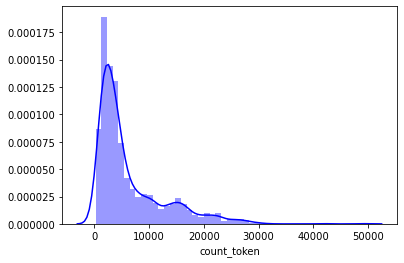

In [22]:
sns.distplot(df['count_token'], color='b')
df['count_token'].describe()

In [23]:
print('90% percentile:  ', int(df['count_token'].quantile(.90)))
print('99.9% percentile:', int(df['count_token'].quantile(.999)))

90% percentile:   15800
99.9% percentile: 34102


count    1728.000000
mean     1574.192708
std      1064.019191
min       119.000000
25%       794.500000
50%      1188.000000
75%      2125.250000
max      7078.000000
Name: count_unique_tokens, dtype: float64

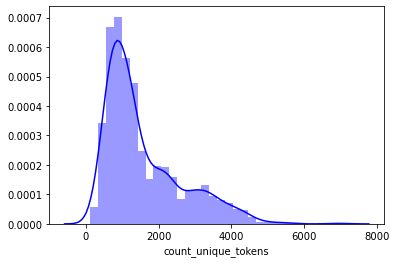

In [24]:
sns.distplot(df['count_unique_tokens'], color='b')
df['count_unique_tokens'].describe()

## Vectorize Data - TF-IDF

TF-IDF is used to check how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.    

Example:

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.  

Now that we have pre-processed the data, it is time to convert it into a format that can be handled by our algorithms. For this purpose we will be using tf-idf. This will convert our string formatted data into a measure of how important each word is to the instance out of the literature as a whole.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = df['best_clean']

tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, lowercase=True, ngram_range=(1,2), max_df=0.85, max_features=10000)

X = tfidf_vectorizer.fit_transform(data)

In [26]:
tfidf_array = X.toarray()
pd.DataFrame(tfidf_array, columns=tfidf_vectorizer.get_feature_names()).head(3)

,00,00 00,00 100,00 20,00 50,00 essential,00 monthly,00 total,000,000 00,...,yet,yield,ymca,york,yorkshire,young,young people,younger,youth,zambia
0,0.050419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035659,0.085718,...,0.000000,0.000000,0.0,0.056591,0.0,0.014016,0.016881,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.023512,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053274,0.000000,...,0.002355,0.007026,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [27]:
X.shape

(1728, 10000)

## PCA

Fewer input variables can result in a simpler predictive model that may have better performance when making predictions on new data. To reduce noise and outliers we do Principal Component Analysis.  

Perhaps the most popular technique for dimensionality reduction in machine learning is Principal Component Analysis, or PCA for short. This is a technique that comes from the field of linear algebra and can be used as a data preparation technique to create a projection of a dataset prior to fitting a model.

We can consider the columns of data representing dimensions on an n-dimensional feature space and the rows of data as points in that space. This is a useful geometric interpretation of a dataset

This can dramatically impact the performance of machine learning algorithms fit on data with many input features, generally referred to as the “curse of dimensionality.”  

Therefore, it is often desirable to reduce the number of input features. This reduces the number of dimensions of the feature space, hence the name “dimensionality reduction.”  

A popular approach to dimensionality reduction is to use techniques from the field of linear algebra. This is often called “feature projection” and the algorithms used are referred to as “projection methods.”  

Projection methods seek to reduce the number of dimensions in the feature space whilst also preserving the most important structure or relationships between the variables observed in the data.  

The reason for keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means.

The reason for this is that by keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data(whilst retaining the essence of the original data.), and make the clustering problem easier for k-means.

In [28]:
from sklearn.decomposition import PCA

#reduce the dimensions while still keeping 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(1728, 922)

## Clustering with K-Means
Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.  
The way kmeans algorithm works is as follows:
Specify number of clusters K.
Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
Compute the sum of the squared distance between data points and all centroids.
Assign each data point to the closest cluster (centroid).
Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.



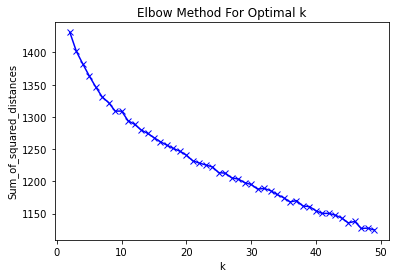

In [29]:
#Applying Elbow Method to find the optimal number of clusters
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2, 50)

for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X_reduced)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

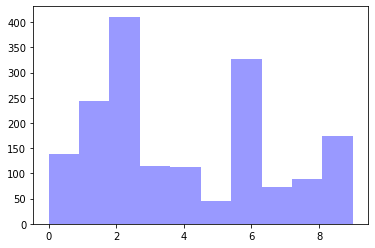

In [31]:
sns.distplot(kmeans.labels_, bins=k, color = "b", kde = False)
plt.show()

In [32]:
df['y'].value_counts()

2    411
6    327
1    243
9    174
0    138
3    114
4    113
8     89
7     74
5     45
Name: y, dtype: int64

In [33]:
X_reduced.shape

(1728, 922)

## Dimensionality Reduction with t-SNE   

t-distributed Stochastic Neighbor Embedding(t-SNE) is a nonlinear dimensionality reduction technique that is well suited for embedding high dimension data into lower dimensional data (2D or 3D) for data visualization.

Using t-SNE we can reduce our high dimensional features vector to 2 dimensions. By using the 2 dimensions as x,y coordinates, the body_text can be plotted  

Step 1: t-SNE constructs a probability distribution on pairs in higher dimensions such that similar objects are assigned a higher probability and dissimilar objects are assigned lower probability.
Step 2: Then, t-SNE replicates the same probability distribution on lower dimensions iteratively till the Kullback-Leibler divergence is minimized.   

Kullback-Leibler divergence is a measure of the difference between the probability distributions from Step1 and Step2. KL divergence is mathematically given as the expected value of the logarithm of the difference of these probability distributions.   
t-SNE stands for t-distributed Stochastic Neighbor Embedding, which tells the following :
Stochastic → not definite but random probability
Neighbor →concerned only about retaining the variance of neighbor points
Embedding → plotting data into lower dimensions
In short, t-SNE is a machine learning algorithm that generates slightly different results each time on the same data set, focusing on retaining the structure of neighbor points.

HYPERPARAMETER TUNING
2 parameters that can highly influence the results are
a) n_iter: The number of iterations that the algorithm runs
b) perplexity: This can be thought of as the number of neighboring points t-SNE must consider


In [34]:
from sklearn.manifold import TSNE

# perplexity: This can be thought of as the number of neighboring points t-SNE must consider
tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1728 samples in 5.722s...
[t-SNE] Computed neighbors for 1728 samples in 61.772s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1728
[t-SNE] Computed conditional probabilities for sample 1728 / 1728
[t-SNE] Mean sigma: 0.413894
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.801510
[t-SNE] KL divergence after 1000 iterations: 1.009717


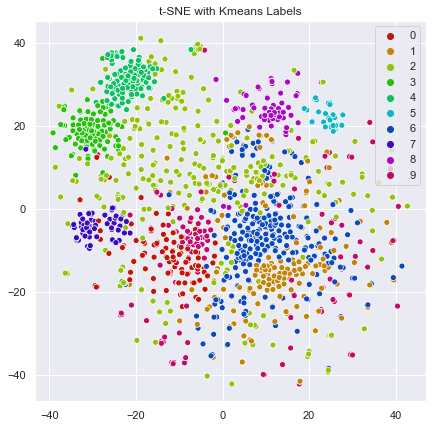

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(7,7)})

# colors
palette = sns.hls_palette(10, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

In [39]:
check = df[df.y == 7]
check

,filename,text_best,best_clean,tokens,count_token,count_unique_tokens,y
86,0be8779b17ed56e34fc5de524972242c.pdf,EC1Y 8AB\nThree Bridges Free Church\nREPORT & ...,EC1Y 8AB Three Bridges Free Church REPORT ACCO...,"[EC1Y, 8AB, Three, Bridges, Free, Church, REPO...",2209,869,7
123,1054c3da15aecc8377d153201ce45e98.pdf,"First Church of Christ, Scientist, Walton and ...",First Church of Christ Scientist Walton and We...,"[First, Church, of, Christ, Scientist, Walton,...",1580,654,7
144,1383457e753c7c79a1689bc23fba110e.pdf,"St Nicholas, Allington, Maidstone ~ Trustees R...",St Nicholas Allington Maidstone Trustees Repor...,"[St, Nicholas, Allington, Maidstone, Trustees,...",1716,777,7
155,154d01224d9939d6b12a1d71bd531efe.pdf,Parish of St Leonards on Sea\nSt Leonard and S...,Parish of St Leonards on Sea St Leonard and St...,"[Parish, of, St, Leonards, on, Sea, St, Leonar...",5261,1639,7
183,19ea8bf028e1e7ee018bdf01fa533e7d.pdf,www. stbk. org. uk\nTHE PAROCHIAL CHURCH COUNC...,www stbk org uk THE PAROCHIAL CHURCH COUNCIL O...,"[www, stbk, org, uk, THE, PAROCHIAL, CHURCH, C...",7247,2030,7
...,...,...,...,...,...,...,...
1648,f224c67af82ba4a32ba74f8d0af89b40.pdf,South Street Evangelical Church\nCharity no 11...,South Street Evangelical Church Charity no 115...,"[South, Street, Evangelical, Church, Charity, ...",6154,1694,7
1657,f34f805b83446502b8b727dd5266bf6b.pdf,"St John the Baptist Church, Knutsford\nANNUAL ...",St John the Baptist Church Knutsford ANNUAL RE...,"[St, John, the, Baptist, Church, Knutsford, AN...",8896,2348,7
1661,f3aed56de4c9356c0d7a425a246d67b6.pdf,THE PARISH OF ST JAMES COLLIER ROW AND\nST JOH...,THE PARISH OF ST JAMES COLLIER ROW AND ST JOHN...,"[THE, PARISH, OF, ST, JAMES, COLLIER, ROW, AND...",2343,886,7
1695,fa949afc3206882795dfaeb7ee2151f4.pdf,Annual Report\nand Accounts\nCharity No. 11245...,Annual Report and Accounts Charity No 1124548 ...,"[Annual, Report, and, Accounts, Charity, No, 1...",3225,1130,7
